# GPU Kernel Performance 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('sgemm_product.csv')

sns.set()
df = df.astype(float)

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

<Figure size 1000x1000 with 2 Axes>

## Tratamento inicial dos dados

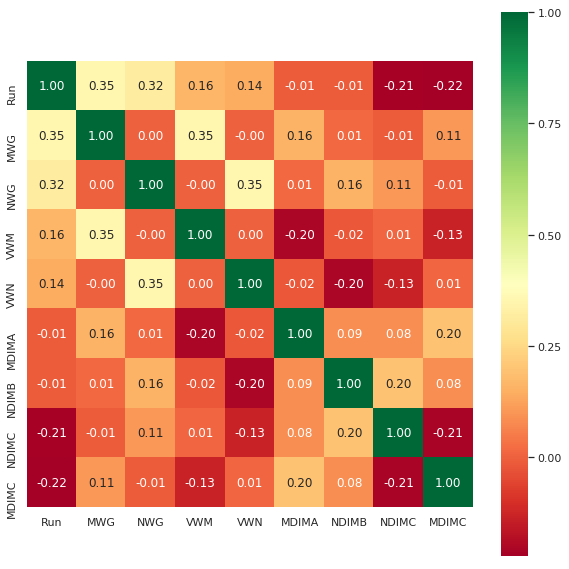

,MWG,NWG,MDIMC,NDIMC,MDIMA,NDIMB,VWM,VWN,Run
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,13.935894,13.935894,17.371126,17.371126,2.448609,2.448609,217.571953
std,42.469220,42.469220,7.873662,7.873662,9.389418,9.389418,1.953759,1.953759,368.750161
min,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000,13.317500
25%,32.000000,32.000000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000,40.667500
50%,64.000000,64.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,69.790000
75%,128.000000,128.000000,16.000000,16.000000,32.000000,32.000000,4.000000,4.000000,228.387500
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,3341.507500


In [2]:
df['Run'] = df[['Run1 (ms)', 'Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df.drop(df.columns[list(range(10, 18))], axis=1, inplace=True)
df.drop(df.columns[[2, 7]], axis=1, inplace=True)
df.head()

correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'Run').index
correlation_map = np.corrcoef(df[columns].values.T)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values,cmap='RdYlGn')

plt.show()

df.describe()

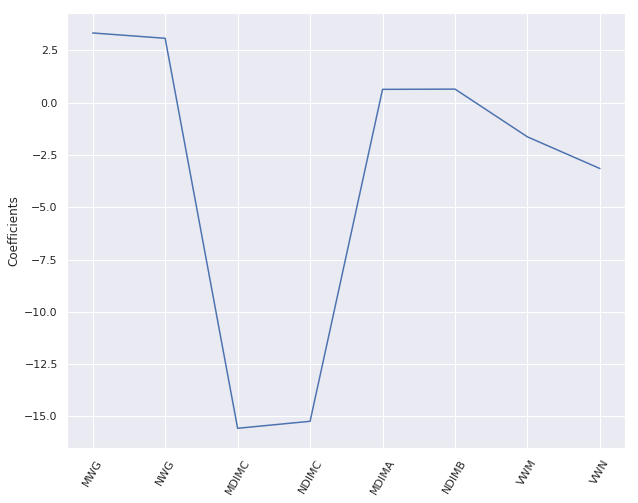

In [3]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X = df.drop('Run',axis=1).values
y = df['Run'].values
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3)

names = df.drop('Run',axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.figure(figsize=(10, 8))
plt.plot(range(len(names)),lasso_coef)
plt.xticks(range(len(names)),names,rotation=60)
plt.ylabel('Coefficients')
plt.show()

In [5]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
cv_results = cross_val_score(reg_all,X_test,y_test,cv=5)

print(mean_absolute_error(y_test, y_pred))
print(np.mean(cv_results))

175.34654362727628
0.3876247415699251
